In [1]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-6500 CPU @ 3.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, skylake)


In [3]:
using Pkg
Pkg.activate("../..")
Pkg.status()
# 패키지 설치해야함.

      Status `~/Project.toml` (empty project)


  Activating new environment at `~/Project.toml`


# Computer arithmetics

## Units of computer storage

Humans use decimal digits (why?) $\rightarrow$ the number of fingers   
Computers use binary digits (why?) $\rightarrow$ using eletronic switches representing on and off


* *Bit* = binary digit (coined by statistician [John Tukey](https://en.wikipedia.org/wiki/Bit#History)).  
* *byte* = 8 bits.
* KB = kilobyte = $10^3$ bytes; KiB = kibibyte = $2^{10}$ bytes.  
'i' stands for integer or information. (과거에는 이렇게 정의했었으나 지금은 10의 power로 재정의함 for bigdata era)
* MB = megabyte = $10^6$ bytes; MiB = mebibyte = $2^{20}$ bytes.
* GB = gigabyte = $10^9$ bytes. Typical RAM size.  
* TB = terabyte = $10^{12}$ bytes. Typical hard drive size. Size of NYSE each trading session.    
* PB = petabyte = $10^{15}$ bytes.  
* EB = exabyte = $10^{18}$ bytes. Size of all healthcare data in 2011 is ~150 EB.    
* ZB = zetabyte = $10^{21}$ bytes. 

Julia function `Base.summarysize` shows the amount of memory (in bytes) used by an object.

In [1]:
x = rand(100, 100)
Base.summarysize(x)

80040

`varinfo()` function prints all variables in workspace and their sizes.

In [2]:
varinfo() # similar to Matlab whos()

| name |       size | summary                 |
|:---- | ----------:|:----------------------- |
| Base |            | Module                  |
| Core |            | Module                  |
| Main |            | Module                  |
| x    | 78.164 KiB | 100×100 Matrix{Float64} |


## Storage of Characters

* Plain text files are stored in the form of characters: `.jl`, `.r`, `.c`, `.cpp`, `.ipynb`, `.html`, `.tex`, ...  
메모장에서도 열리지만 편의상 code editor로 주로 열게 됨.
* ASCII (American Code for Information Interchange): 7 bits, only $2^7=128$ characters.  
code : 문자를 숫자로 나타내는 약속 또는 mapping. 예를 들면 $a\mapsto 1, z\mapsto 26$ 

In [5]:
# integers 0, 1, ..., 127 and corresponding ascii character
[0:127 Char.(0:127)]

# backslash `\` 붙어있는 문자는 제어코드. 예를 들면 '\t'는 tab, '\n'은 new line을 나타냄.

128×2 Matrix{Any}:
   0  '\0'
   1  '\x01'
   2  '\x02'
   3  '\x03'
   4  '\x04'
   5  '\x05'
   6  '\x06'
   7  '\a'
   8  '\b'
   9  '\t'
  10  '\n'
  11  '\v'
  12  '\f'
   ⋮  
 116  't'
 117  'u'
 118  'v'
 119  'w'
 120  'x'
 121  'y'
 122  'z'
 123  '{'
 124  '|'
 125  '}'
 126  '~'
 127  '\x7f'

* Extended ASCII: 8 bits, $2^8=256$ characters.  

In [6]:
# integers 128, 129, ..., 255 and corresponding extended ascii character
# 유럽어권에서 사용하기 위해 추가함.
# show(STDOUT, "text/plain", [128:255 Char.(128:255)])
[128:255 Char.(128:255)]

128×2 Matrix{Any}:
 128  '\u80'
 129  '\u81'
 130  '\u82'
 131  '\u83'
 132  '\u84'
 133  '\u85'
 134  '\u86'
 135  '\u87'
 136  '\u88'
 137  '\u89'
 138  '\u8a'
 139  '\u8b'
 140  '\u8c'
   ⋮  
 244  'ô'
 245  'õ'
 246  'ö'
 247  '÷'
 248  'ø'
 249  'ù'
 250  'ú'
 251  'û'
 252  'ü'
 253  'ý'
 254  'þ'
 255  'ÿ'

* Unicode: UTF-8, UTF-16 and UTF-32 support many more characters including foreign characters; last 7 digits conform to ASCII. 

* [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the current dominant character encoding on internet.  

<img src="./images/unicode.png" width="800" align="center"/>

Source: [Google Blog](https://googleblog.blogspot.com/2012/02/unicode-over-60-percent-of-web.html)

* Julia supports the full range of UTF-8 characters. You can type many Unicode math symbols by typing the backslashed LaTeX symbol name followed by tab. 

한글의 경우 초성 중성 종성 조합해서 한 글자를 나타내므로 조합의 개수를 생각하면 매우 많은 조합수가 필요하다. "ㅈㅜㄹㄹㅣㅇㅏ" 로 치지 않고 "줄리아" 라고 입력하기 때문. 현대 한글은 11172자 필요(출처 : 위키피디아 <한글 음절>). 1바이트로는 턱없이 부족. 한자의 경우 훨씬 심함.
이런 문제를 해결하기 위해 ASCII 체제를 대체할 UTF 체제가 등장. 한글 및 한자는 2바이트를 사용. ($2^{16}=65536$)

In [9]:
# \beta-<tab>
β = 0.0
# \beta-<tab>-\hat-<tab>
β̂ = 0.0

0.0

* For a table of unicode symbols that can be entered via tab completion of LaTeX-like abbreviations: <https://docs.julialang.org/en/v1.1/manual/unicode-input/#Unicode-Input-1>

## Integers: fixed-point number system

* Fixed-point number system is a computer model for integers $\mathbb{Z}$. 
    - **Remember** that computer memory is finite whereas the cardinality of $\mathbb{Z}$ is (countably) infinite.  
    수학에서 정의한 정수 집합을 그대로 컴퓨터에서 나타내는 것은 불가능
    - *Any* representation of numbers in computer *has to be* an approximation.

* The number $M$ of bits and method of representing negative numbers vary from system to system. 
    - The `integer` type in R has $M=32$ (packages such as ‘bit64’support 64 bit integers). 
        + <https://www.r-bloggers.com/r-in-a-64-bit-world/>
    - C has (`unsigned`) `char`, `int`, `short`, `long` (and `long long`), whose sizes depend on the machine.
    - Matlab has `(u)int8`, `(u)int16`, `(u)int32`, `(u)int64`.  
    - 64 bit 컴퓨터는 한 번에 처리할 수 있는 연산이 64비트 짜리 숫자까지 가능.
    - "한번에 처리하는 연산" 이라는 것은 레지스터 하나가 저장할 수 있는 정보 단위. 

* Julia has even more integer types: 

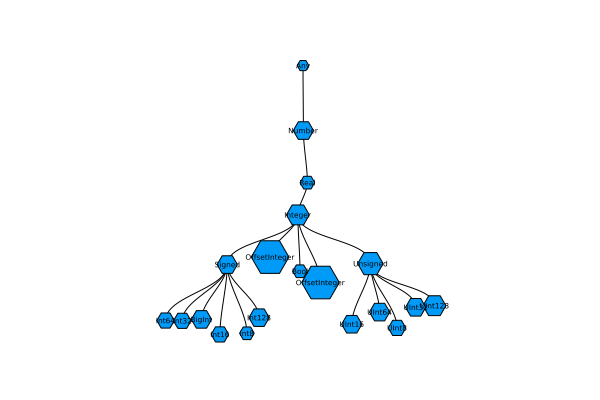

In [1]:
using GraphRecipes, Plots

gr(size=(2000, 1600))
theme(:default)

plot(Integer, method=:tree, fontsize=5)

source: [Visualizing Graphs in Julia using Plots and PlotRecipes](http://www.breloff.com/Graphs/)

### Unsigned integers

* Model for $\mathbb{N} \cup \{0\}$.
* For unsigned integers, the range is $[0,2^M-1]$.
* Julia functions `typemin(T)` and `typemax(T)` give the lowest and highest representable number of a type `T` respectively

In [11]:
for t in [UInt8, UInt16, UInt32, UInt64, UInt128]
    println(t, '\t', typemin(t), '\t', typemax(t))
end

# 질문 ; 64 비트 컴퓨터인데 128 비트가 따로 있는 이유는? 한번에 처리할 수 있는 연산에 들어갈 수 없으면 굳이 있는 이유가?
# 128비트의 경우 소프트웨어적인 처리가 필요

UInt8	0	255
UInt16	0	65535
UInt32	0	4294967295
UInt64	0	18446744073709551615
UInt128	0	340282366920938463463374607431768211455


### Signed integers

* Model of $\mathbb{Z}$. Can do subtraction. (Closed under subtraction)

* First bit ("most significant bit" or MSB) is the sign bit. ($\leftrightarrow$ The last bit is LSB ; least significant)
    - `0` for nonnegative numbers
    - `1` for negative numbers  
    - Two problems exist. 
        - 00001000 is 8. If 10001000 is -8 then 8+(-8)=0 does not hold.
        - Also we have two zeros ; 00000000 and 10000000
    - Because of these problems, we use the method below.
* **Two's complement representation** for negative numbers. 
    - Set the sign bit to 1  
    - Negate (`0`->`1`, `1`->`0`) the remaining bits
    - Add to `1` to the result  
        - 00001000 is 8. Then -8 = 11110111+1=11111000 when M=8
        - 8+(-8) = 1_0000_0000 which is a 9=M+1 bit number. So we dismiss the first bit, which results in 0.
    - Two's complement representation of a negative integer $x$ is the same as the unsigned integer $2^M - x$.
    - modulo operator (mod $2^M$). For example, when M=8, we have 256=0. 257=1. 248=-8.
    - For postive integer x, we have $x+(2^M-x)=2^M=0 \;(\, mod\, 2^M)$ which explains why $-x=2^M-x$.

In [46]:
@show typeof(5)
@show bitstring(5)
@show bitstring(-5)
@show bitstring(UInt64(Int128(2)^64 - 5)) == bitstring(-5)
# 2^64 needs 65 bit. UInt64로는 안됨.
@show bitstring(2 * 5) # shift bits of 5 to the left
@show bitstring(2 * -5); # shift bits of -5 to left
# scaling by 2 is easily done. What about scaling by another positive integer..? (It's way more difficult)

typeof(5) = Int64
bitstring(5) = "0000000000000000000000000000000000000000000000000000000000000101"
bitstring(-5) = "1111111111111111111111111111111111111111111111111111111111111011"
bitstring(UInt64(Int128(2) ^ 64 - 5)) == bitstring(-5) = true
bitstring(2 * 5) = "0000000000000000000000000000000000000000000000000000000000001010"
bitstring(2 * -5) = "1111111111111111111111111111111111111111111111111111111111110110"


* Two's complement representation respects modular arithmetic nicely.  
    Addition of any two signed integers are just bitwise addition, possibly modulo $2^M$
    - $M=4$ case:
    
<img src="http://users.dickinson.edu/~braught/courses/cs251f02/classes/images/twosCompWheel.png" width="400" align="center"/>    

Source: [Signed Binary Numbers, Subtraction and Overflow](http://users.dickinson.edu/~braught/courses/cs251f02/classes/notes07.html) by Grant Braught

* **Range** of representable integers by $M$-bit **signed integer** is $[-2^{M-1},2^{M-1}-1]$:
    - 0을 표현하기 위해 양수 개수 하나 희생
    - $10000\cdots 000$ 은 음수로 취급

In [13]:
typemin(Int64), typemax(Int64)
# 양수 : 0000...0001 ~ 0111...1111 which is equivalent to 1 ~ 2^63-1
# 음수 : 1111...1111 ~ 1000...0001 and 1000...0000 which is equivalent to -1 ~ -(2^63)-1 and -2^63

(-9223372036854775808, 9223372036854775807)

In [1]:
for T in [Int8, Int16, Int32, Int64, Int128]
    println(T, '\t', typemin(T), '\t', typemax(T))
end

Int8	-128	127
Int16	-32768	32767
Int32	-2147483648	2147483647
Int64	-9223372036854775808	9223372036854775807
Int128	-170141183460469231731687303715884105728	170141183460469231731687303715884105727


### `BigInt`

Julia `BigInt` type is arbitrary precision.

In [14]:
@show typemax(Int128)
@show typemax(Int128) + 1 # overflow! the most unintuitive one in computer arithmetic.
# As we see in the figure above, if M=4, then maximum integer is 0111=7 and 0111+1 is 1000 = -8 which is the minimum integer.
@show BigInt(typemax(Int128)) + 1;  # prevent overflow. A kind of library. 실제 연산에 사용하기는 곤란.

typemax(Int128) = 170141183460469231731687303715884105727
typemax(Int128) + 1 = -170141183460469231731687303715884105728
BigInt(typemax(Int128)) + 1 = 170141183460469231731687303715884105728


In [28]:
println(2^63-1)
println(2^63)
# Default인 64bit Integer에서 양수 최대값은 0111...1111 = 2^63-1
# 1000...0000 = - 2^63 으로 정해져 있기 때문에 이런 직관에 반하는 결과가 나오는 것.
println(BigInt(2^63-1)+1)
println(2^63+1)

9223372036854775807
-9223372036854775808
9223372036854775808
-9223372036854775807


### Overflow in integer arithmetic

R reports `NA` for integer overflow.
**Julia outputs the result according to modular arithmetic.**

In [14]:
@show typemax(Int32)  # which is 2^31-1 = 0111...1111
@show typemax(Int32) + Int32(1); # modular arithmetics!

typemax(Int32) = 2147483647
typemax(Int32) + Int32(1) = -2147483648


In [5]:
using RCall
# The largest integer R can hold
# R은 기본적으로 32bit signed integer를 지원. 
R"""
.Machine$integer.max 
"""

RObject{IntSxp}
[1] 2147483647


In [16]:
R"""
M <- 32
big <- 2^(M-1) - 1
as.integer(big)
"""

RObject{IntSxp}
[1] 2147483647


In [17]:
R"""
as.integer(big+1)
"""

┌ Warning: RCall.jl: Warning: NAs introduced by coercion to integer range
└ @ RCall /Users/jhwon/.julia/packages/RCall/iMDW2/src/io.jl:160


RObject{IntSxp}
[1] NA


## Real numbers: floating-point number system

Floating-point number system is a computer model for the real line $\mathbb{R}$.  
Fixed point : point is fixed next to the last digit. $\; \leftrightarrow \;$ Floating point : point is floating

* Most computer systems adopt the [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_floating_point), established in 1985, for floating-point arithmetics.  
For the history, see an [interview with William Kahan](http://www.cs.berkeley.edu/~wkahan/ieee754status/754story.html).

* In the scientific notation, a real number is represented as
$$
\pm d_1.d_2d_3 \cdots d_p \times b^e, \quad 0 \le d_i < b.
$$
Humans use the _base_ $b=10$ and _digits_ $d_i=0, 1, \dotsc, 9$.\
    In computer, the base is $b=2$ and the digits $d_i$ are 0 or 1. The *exponent* $e$ is between $e_{\min}$ and $e_{\max}$.  
    The point floats corresponding to $e$.  

* **Normalized** vs **denormalized** numbers. Normalized is $d_1\neq0$. (which implies that $d_1=1$ is fixed.)  
For example, decimal number 18 is
$$ +1.0010 \times 2^4 \quad (\text{normalized})$$
or, equivalently,
$$ +0.1001 \times 2^5 \quad (\text{denormalized}).$$  

* In the floating-number system, computer stores 
    - sign bit  
    - the _fraction_ (or _mantissa_, or _significand_)(유효숫자) of the **normalized** representation (except some special cases) ; $d_1, \cdots, d_p$
    - Note that $d_1=1$ is determined because we use normalized representation. So what we need to strore is p-1 bit digits $d_2, \cdots, d_p$
    - the actual exponent plus a *bias*
        + Because $e_{\min}$ is likely negative and $e_{\max}$ is positive, the exponent requires a sign. IEEE 754 handles the sign of the exponent by subtracting the bias from the value of the exponent evaluated as an unsigned integer.

* Julia provides `Float16` (half precision, implemented in software using `Float32`), `Float32` (single precision), `Float64` (double precision), and `BigFloat` (arbitrary precision).

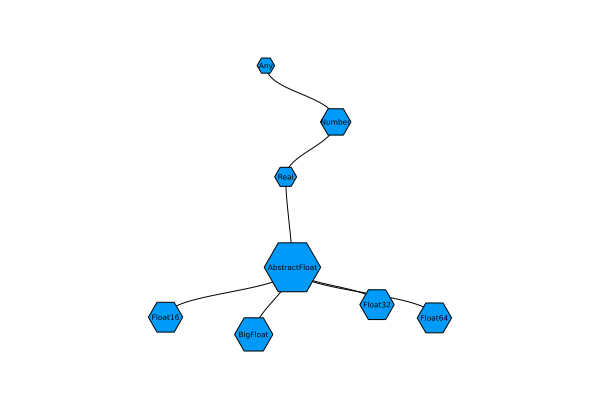

In [2]:
using GraphRecipes, Plots

#pyplot(size=(800, 600))
gr(size=(600, 400))
theme(:default)

plot(AbstractFloat, method=:tree, fontsize=5)

### Half precision (Float16)

<img src="./images/half-precision-numbers.png" width="300" align="center"/>

Source: <https://en.wikipedia.org/wiki/Half-precision_floating-point_format>
    
- In Julia, `Float16` is the type for half precision numbers.

- MSB is the sign bit.  

- 10 significand bits (**fraction**=**mantissa**), hence $p=11$ (why? $d_1=1$ is fixed and $d_2,\cdots d_{11}$ should be determined )

- 5 exponent bits: $e_{\max}=15$, $e_{\min}=-14$, **bias**=15 = $01111_2$ for encoding:
    + $e_{\min} = \mathbf{00001_2} - 01111_2 = -14_{10}$
    + $e_{\max} = \mathbf{11110_2} - 01111_2 = 15_{10}$

- $e_{\text{min}}-1=\mathbf{00000_2}$ and $e_{\text{max}}+1=\mathbf{11111_2}$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 4}$ in decimal because $\log_{10} (2^{15}) \approx 4$.  

- **Precision**: $\log_{10}2^{11} \approx 3.311$ decimal digits ; $\log_{10}2^{-11}\approx -3.311$ so that $2^{-11}\approx \frac{1}{2046}\approx 0.0005$. It means that given exponent $e=-1$, precision error is bounded by $0.0005$

$$
(value) = (-1)^{b_{15}}\times 2^{(\sum_{j=1}^5 b_{15-j}\,2^{5-j}) - 15} \times \left( 1 + \sum_{i=1}^{10}\frac{b_{10-i}}{2^i}\right)
$$

In [57]:
println("Half precision:")
# 5 = 1.01 * 2^2 so exponent is 2, fraction is (1).01
@show bitstring(Float16(5)) # 5 in half precision
@show bitstring(Float16(-5)); # -5 in half precision
# Note that we cannot do subtraction 5+(-5)= 0 with bitwise addition. Arithmetic operation in float number system is way more complicated than in fixed number system.

Half precision:
bitstring(Float16(5)) = "0100010100000000"
bitstring(Float16(-5)) = "1100010100000000"


In [52]:
bitstring(Float16(0.75))
# 0.5 = 2^(-1)+2^(-2) so exponent is -1, fraction is (1).1 

"0011101000000000"

In [48]:
bitstring(Float16(0.81613))
# Interpret the output below
# 01110=14 so exponent is 14-15=-1.  fraction is (1).1010000111

"0011101010000111"

In [62]:
println(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11)
println(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11 + 1/2^11)
println(abs(0.81613-(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11)))
# Float16 has precision error about 0.00021 for representing 0.81613

0.81591796875
0.81640625
0.0002120312500000221


### Single precision (Float32)

<img src="./images/single-precision-numbers.png" width="600" align="center"/>

Source: <https://en.wikipedia.org/wiki/Single-precision_floating-point_format>

- In Julia, `Float32` is the type for single precision numbers.  

- MSB is the sign bit.  

- 23 significand bits ($p=24$).  

- 8 exponent bits: $e_{\max}=127$, $e_{\min}=-126$, **bias**=127.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 38}$ in decimal because $\log_{10} (2^{127}) \approx 38$.

- **precision**: $\log_{10}(2^{24}) \approx 7.225$ decimal digits. ; $\log_{10}2^{-24}\approx -7.225 $ so that $2^{-24}\approx \frac{1}{16788040}\approx 0.00000006$. It means that given exponent $e=-1$, precision error is bounded by $0.00000006$

In [20]:
println("Single precision:")
@show bitstring(Float32(5)) # 5 in single precision
@show bitstring(Float32(-5)); # -5 in single precision

Single precision:
bitstring(Float32(5)) = "01000000101000000000000000000000"
bitstring(Float32(-5)) = "11000000101000000000000000000000"


In [58]:
bitstring(Float32(0.81613))
# exponent is -1 and fraction is (1).10100001110110111100101

"00111111010100001110110111100101"

In [63]:
println(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11 + 1/2^13 + 1/2^14 + 1/2^16 + 1/2^17 + 1/2^18 + 1/2^19 + 1/2^22 + 1/2^24)
println(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11 + 1/2^13 + 1/2^14 + 1/2^16 + 1/2^17 + 1/2^18 + 1/2^19 + 1/2^22 + 1/2^24 + 1/2^24)
println(abs(0.81613-(1/2 + 1/2^2 + 1/2^4 + 1/2^9 + 1/2^10 + 1/2^11 + 1/2^13 + 1/2^14 + 1/2^16 + 1/2^17 + 1/2^18 + 1/2^19 + 1/2^22 + 1/2^24)))
# Float32 has precision error about 0.000000017 for representing 0.81613

0.8161299824714661
0.8161300420761108
1.7528533957644754e-8


### Double precision (Float64)

<img src="./images/double-precision-numbers.png" width="600" align="center"/>

Source: <https://en.wikipedia.org/wiki/Double-precision_floating-point_format>

- Double precision (64 bits = 8 bytes) numbers are the dominant data type in scientific computing.
      
- In Julia, `Float64` is the type for double precision numbers.    

- MSB is the sign bit.  

- 52 significand bits ($p=53$).

- 11 exponent bits: $e_{\max}=1023$, $e_{\min}=-1022$, **bias**=1023.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 308}$ in decimal because $\log_{10} (2^{1023}) \approx 308$.  

- **precision** to the $\log_{10}(2^{53}) \approx 15.95$ decimal point ; $\log_{10}2^{-53}\approx -15.95 $ so that $2^{-53}\approx \frac{1}{8912509381337441}\approx 0.0000000000000001$. It means that given exponent $e=-1$, precision error is bounded by $0.0000000000000001$

In [21]:
println("Double precision:")
@show bitstring(Float64(5)) # 5 in double precision
@show bitstring(Float64(-5)); # -5 in double precision

Double precision:
bitstring(Float64(5)) = "0100000000010100000000000000000000000000000000000000000000000000"
bitstring(Float64(-5)) = "1100000000010100000000000000000000000000000000000000000000000000"


### Special floating-point numbers

- Exponent $e_{\max}+1=\mathbf{111\cdots 111}_2$ plus a *zero mantissa* means $\pm \infty$.

In [22]:
@show bitstring(Inf) # Inf in double precision
@show bitstring(-Inf); # -Inf in double precision

bitstring(Inf) = "0111111111110000000000000000000000000000000000000000000000000000"
bitstring(-Inf) = "1111111111110000000000000000000000000000000000000000000000000000"


- Exponent $e_{\max}+1$ plus a *nonzero mantissa* means `NaN`. `NaN` could be produced from `0 / 0`, `0 * Inf`, ...  

- In general `NaN ≠ NaN` bitwise. Test whether a number is `NaN` by `isnan` function.
- NaN stands for not a number

In [23]:
@show bitstring(0 / 0) # NaN ; mantisa is 1100...000
@show bitstring(0 * Inf); # NaN ; mantisa is 1000...000

bitstring(0 / 0) = "1111111111111000000000000000000000000000000000000000000000000000"
bitstring(0Inf) = "1111111111111000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1=\mathbf{000\cdots 000}_2$ with a *zero mantissa* represents the real number 0 ("exact zero").  
    + Why do we need an exact zero?

In [24]:
@show bitstring(0.0); # 0 in double precision 

bitstring(0.0) = "0000000000000000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1$ with a nonzero mantissa are for numbers less than $b^{e_{\min}}$ (subnormal numbers).
- Numbers are _denormalized_ in the range $(0,b^{e_{\min}})$ -- **gradual underflow**. 
- For example, in half-precision, $e_{\min}=-14$ but $2^{-24}$ is represented by $0.0000000001_2 \times 2^{-14}$.
- If floating point numbers are all normalized, the spacing between 0 and $b^{e_{\min}}$ is just $b^{e_{\min}}$, whereas the spacing between $b^{e_{\min}}$ and $b^{e_{\min}+1}$ is $b^{e_{\min}-p+1}$. With subnormal numbers, the spacing between 0 and $b^{e_{\min}}$ can be $b^{e_{\min}-p}$, which is more consistent with the spacing just above $b^{e_{\min}}$.

In [25]:
@show Float16(2^(-14))  # emin=-14
@show bitstring(Float16(2^(-14)));
@show Float16(2^(-24))  # emin=-14
@show bitstring(Float16(2^(-24))); # denormalized

Float16(2 ^ -14) = Float16(6.104e-5)
bitstring(Float16(2 ^ -14)) = "0000010000000000"
Float16(2 ^ -24) = Float16(6.0e-8)
bitstring(Float16(2 ^ -24)) = "0000000000000001"


In [26]:
@show nextfloat(Float16(0.0)) # next representable number
@show bitstring(nextfloat(Float16(0.0))); # denormalized

nextfloat(Float16(0.0)) = Float16(6.0e-8)
bitstring(nextfloat(Float16(0.0))) = "0000000000000001"


### Rounding

* Rounding is necessary whenever a number has more than $p$ significand bits. Most computer systems use the default IEEE 754 _round to nearest_ mode (also called _ties to even_ mode). Julia offers several [rounding modes](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundingMode), the default being [`RoundNearest`](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundNearest). 

* "*Round to nearest, ties to even*" rule: rounds to the nearest value; if the number falls midway, it is rounded to the nearest value with an even least significant digit (i.e., zero; default for IEEE 754 binary floating point numbers)

* For example, the number 1/10 cannot be represented accurately as a (binary) floating point number:
$$ 0.1 = 1.10011001\dotsc_2 \times 2^{-4} $$

In [27]:
@show bitstring(0.1);  # double precision Float64
@show bitstring(0.1f0); # single precision Float32, 1001 gets rounded to 101(0)
@show bitstring(Float16(0.1)); # half precision Float16, 1001 gets rounded to 101(0)

bitstring(0.1) = "0011111110111001100110011001100110011001100110011001100110011010"
bitstring(0.1f0) = "00111101110011001100110011001101"
bitstring(Float16(0.1)) = "0010111001100110"


### Errors

Rounding (more fundamentally, finite precision) incurs errors in floating porint computation. If a real number $x$ is represented by a floating point number $[x]$, then

* Absolute error
$$
    | [x] - x |
$$

* Relative error
$$
    \frac{| [x] - x |}{|x|}
$$
(if $x \neq 0$).

Of course, we want to ensure that the error after a computation is small.

### Machine epsilons

- Floating-point numbers do not occur uniformly over the real number line
    <img src="http://www.volkerschatz.com/science/pics/fltscale-wh.png" width="700" align="center"/>
        
Source: [What you never wanted to know about floating point but will be forced to find out](http://www.volkerschatz.com/science/float.html)
    
- Same number of representible numbers in $(2^i, 2^{i+1}]$ as in $(2^{i+1}, 2^{i+2}]$. Within an interval, they are uniformly distributed.
    
- **Machine epsilons** are the spacings of numbers around 1: 
    + $\epsilon_{\max}$ = (smallest positive floating point number that added to 1 will give a result different from 1) = $\frac{1}{2^p} + \frac{1}{2^{2p-1}}$
    + $\epsilon_{\min}$ = (smallest positive floating point number that subtracted from 1 will give a result different from 1) = $\frac{1}{2^{p+1}} + \frac{1}{2^{2p}}$.
    + That is, $1 + \epsilon_{\max}$ is the number in the "midway" between 1 and the floating point number right next to it, etc.
    
    <img src="./machine_epsilons.png" width="500" align="center"/>

Source: *Computational Statistics*, James Gentle, Springer, New York, 2009.

*Caution: the definition of $\epsilon_{\max}$ and $\epsilon_{\min}$ in this book is different from the lecture note.*
    
- Any real number in the interval $\left[1 - \frac{1}{2^{p+1}}, 1 + \frac{1}{2^p}\right]=[1.111\dotsb1|1_2 \times 2^{-1}, 1.000\dotsb 0|1 \times 2^0]$ is represented by a floating point number $1 = 1.00\dotsc 0_2 \times 2^0$ (assuming the "ties to even" rule: consider $p=2$ case).

- Adding $\frac{1}{2^p}$ to 1 won't reach the next representable floating point number  $1.00\dotsc 01_2 \times 2^0 = 1 + \frac{1}{2^{p-1}}$. Hence $\epsilon_{\max} > \frac{1}{2^p} = 1.00\dotsc 0_2 \times 2^{-p}$.

- Adding the floating point number *next to* $\frac{1}{2^p} = 1.00\dotsc 0_2 \times 2^{-p}$ to 1 WILL result in $1.00\dotsc 01_2 \times 2^0 = 1 + \frac{1}{2^{p-1}}$, hence $\epsilon_{\max} = 1.00\dotsb 01_2 \times 2^{-p} = \frac{1}{2^p} + \frac{1}{2^{p+p-1}}$.

- Subtracting $\frac{1}{2^{p+1}}$ from 1 results in $1-\frac{1}{2^{p+1}} = \frac{1}{2} + \frac{1}{2^2} + \dotsb + \frac{1}{2^p} + \frac{1}{2^{p+1}}$, which is represented by the floating point number $1.00\dotsb 0_2 \times 2^{0} = 1$ by the "ties to even" rule. Hence $\epsilon_{\min} > \frac{1}{2^{p+1}}$.

- The smallest positive floating point number larger than $\frac{1}{2^{p+1}}$ is $\frac{1}{2^{p+1}} + \frac{1}{2^{2p}}=1.00\dotsc 1_2 \times 2^{-p-1}$. Thus $\epsilon_{\min} = \frac{1}{2^{p+1}} + \frac{1}{2^{2p}}$.

### Machine precision

* Machine epsilon is often called the machine precision.

* If a positive real number $x \in \mathbb{R}$ is represented by $[x]$ in the floating point arithmetic, then 
$$
    [x] = \left( 1 + \sum_{i=1}^{p-1}\frac{b_{i+1}}{2^i}\right) \times 2^e.
$$
Thus $x - \frac{2^e}{2^p} < [x] \le x + \frac{2^e}{2^p}$, 
and
$$
    \begin{split}
    \frac{| x - [x] |}{|x|} &\le \frac{2^e}{2^p|x|} \le \frac{2^e}{2^p}\frac{1}{[x]-2^e/2^p} \\
                            &\le \frac{2^e}{2^p}\frac{1}{2^e(1-1/2^p)}  \quad (\because [x] \ge 2^e) \\
                            &\le \frac{2^e}{2^p}\frac{1}{2^e}(1 + \frac{1}{2^{p-1}}) \\
                            &= \frac{1}{2^p} + \frac{1}{2^{2p-1}} = \epsilon_{\max}.
    \end{split}
$$
That is, the **relative error** of the floating point representation $[x]$ of real number $x$ is bounded by $\epsilon_{\max}$.

In [28]:
@show 2^(-53) + 2^(-105);   # epsilon_max for Float64
@show 1.0 + 2^(-53);
@show 1.0 + (2^(-53) + 2^(-105));
@show 1.0 + 2^(-53) + 2^(-105);  # why is the result?  See "Catastrophic cancellation"

@show Float32(2^(-24) + 2^(-47)); # epsilon_max for Float32
@show 1.0f0 + Float32(2^(-24));
@show 1.0f0 + Float32(2^(-24) + 2^(-47));

2 ^ -53 + 2 ^ -105 = 1.1102230246251568e-16
1.0 + 2 ^ -53 = 1.0
1.0 + (2 ^ -53 + 2 ^ -105) = 1.0000000000000002
1.0 + 2 ^ -53 + 2 ^ -105 = 1.0
Float32(2 ^ -24 + 2 ^ -47) = 5.960465f-8
1.0f0 + Float32(2 ^ -24) = 1.0f0
1.0f0 + Float32(2 ^ -24 + 2 ^ -47) = 1.0000001f0


In [29]:
@show 2^(-54) + 2^(-106);  # epsilon_min for Float64
@show 1 - (2^(-54) + 2^(-106))
@show bitstring(1.0)
@show bitstring(1 - (2^(-54) + 2^(-106)))

2 ^ -54 + 2 ^ -106 = 5.551115123125784e-17
1 - (2 ^ -54 + 2 ^ -106) = 0.9999999999999999
bitstring(1.0) = "0011111111110000000000000000000000000000000000000000000000000000"
bitstring(1 - (2 ^ -54 + 2 ^ -106)) = "0011111111101111111111111111111111111111111111111111111111111111"


"0011111111101111111111111111111111111111111111111111111111111111"

In Julia, `eps(x)` gives the distance between consecutive representable floating point values at `x`, i.e.,
```Julia
eps(x) == max(x-prevfloat(x), nextfloat(x)-x)
```
which is roughly twice the $\epsilon_{\max}$.

In [30]:
@show eps(Float32)  # machine epsilon for a floating point type, roughly twice our \epsilon_{\max}
@show eps(Float64)  # same as eps()
# eps(x) is the spacing after x
@show eps(100.0)
@show eps(0.0)
# nextfloat(x) and prevfloat(x) give the neighbors of x
@show x = 1.25f0
@show prevfloat(x), x, nextfloat(x)
@show bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x));

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16
eps(100.0) = 1.4210854715202004e-14
eps(0.0) = 5.0e-324
x = 1.25f0 = 1.25f0
(prevfloat(x), x, nextfloat(x)) = (1.2499999f0, 1.25f0, 1.2500001f0)
(bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x))) = ("00111111100111111111111111111111", "00111111101000000000000000000000", "00111111101000000000000000000001")


* In R, the variable `.Machine` contains numerical characteristics of the machine. `double.eps` and `double.neg.eps` are roughly twice our $\epsilon_{\max}$ and $\epsilon_{\min}$, respectively.

In [31]:
R"""
.Machine
"""

RObject{VecSxp}
$double.eps
[1] 2.220446e-16

$double.neg.eps
[1] 1.110223e-16

$double.xmin
[1] 2.225074e-308

$double.xmax
[1] 1.797693e+308

$double.base
[1] 2

$double.digits
[1] 53

$double.rounding
[1] 5

$double.guard
[1] 0

$double.ulp.digits
[1] -52

$double.neg.ulp.digits
[1] -53

$double.exponent
[1] 11

$double.min.exp
[1] -1022

$double.max.exp
[1] 1024

$integer.max
[1] 2147483647

$sizeof.long
[1] 8

$sizeof.longlong
[1] 8

$sizeof.longdouble
[1] 16

$sizeof.pointer
[1] 8

$longdouble.eps
[1] 1.084202e-19

$longdouble.neg.eps
[1] 5.421011e-20

$longdouble.digits
[1] 64

$longdouble.rounding
[1] 5

$longdouble.guard
[1] 0

$longdouble.ulp.digits
[1] -63

$longdouble.neg.ulp.digits
[1] -64

$longdouble.exponent
[1] 15

$longdouble.min.exp
[1] -16382

$longdouble.max.exp
[1] 16384



### Overflow and underflow of floating-point number

* For double precision, the range is $\pm 10^{\pm 308}$. In most situations, underflow (magnitude of result is less than $10^{-308}$) is preferred over overflow (magnitude of result is larger than $10^{+308}$). Overflow produces $\pm \inf$. Underflow yields zeros or subnormal numbers. 

* E.g., the logit link function is
$$p = \frac{\exp (x^T \beta)}{1 + \exp (x^T \beta)} = \frac{1}{1+\exp(- x^T \beta)}.$$
The former expression can easily lead to `Inf / Inf = NaN`, while the latter expression leads to gradual underflow.

* `floatmin` and `floatmax` functions gives largest and smallest _non-submormal_ number represented by the given floating point type.

In [32]:
for T in [Float16, Float32, Float64]
    println(T, '\t', floatmin(T), '\t', floatmax(T), '\t', typemin(T), 
        '\t', typemax(T), '\t', eps(T))
end

Float16	6.104e-5	6.55e4	-Inf	Inf	0.000977
Float32	1.1754944e-38	3.4028235e38	-Inf	Inf	1.1920929e-7
Float64	2.2250738585072014e-308	1.7976931348623157e308	-Inf	Inf	2.220446049250313e-16


* `BigFloat` in Julia offers arbitrary precision.

In [33]:
@show precision(BigFloat)
@show floatmin(BigFloat)
@show floatmax(BigFloat);

precision(BigFloat) = 256
floatmin(BigFloat) = 8.50969131174083613912978790962048280567755996982969624908264897850135431080301e-1388255822130839284
floatmax(BigFloat) = 5.875653789111587590936911998878442589938516392745498308333779606469323584389875e+1388255822130839282


In [34]:
@show BigFloat(π); # default precision for BigFloat is 256 bits
# set precision to 1024 bits
setprecision(BigFloat, 1024) do 
    @show BigFloat(π)
end;

BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286198
BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724586997


## Catastrophic cancellation

> The result of computation is just the digits that represented the rounding.

* **Scenario 1** (benign cancellation): Addition or subtraction of two numbers of widely different magnitudes: $a+b$ or $a-b$ where $a \gg b$ or $a \ll b$. We lose the precision in the number of smaller magnitude. Consider 
$$\begin{eqnarray*}
    a &=& x.xxx ... \times 2^{30} \\  
    b &=& y.yyy... \times 2^{-30}
\end{eqnarray*}$$
What happens when computer calculates $a+b$? We get $a+b=a$!

In [35]:
@show a = 2.0^30
@show b = 2.0^-30
@show a + b == a
@show bitstring(a)
@show bitstring(a + b);

a = 2.0 ^ 30 = 1.073741824e9
b = 2.0 ^ -30 = 9.313225746154785e-10
a + b == a = true
bitstring(a) = "0100000111010000000000000000000000000000000000000000000000000000"
bitstring(a + b) = "0100000111010000000000000000000000000000000000000000000000000000"


Analysis: suppose we want to compute $x + y$, $x, y > 0$. Let the relative error of $x$ and $y$ be
$$
\delta_x = \frac{[x] - x}{x},
\quad
\delta_y = \frac{[y] - y}{y}
.
$$
What the computer actually calculates is $[x] + [y]$, which in turn is represented by $[ [x] + [y] ]$. The relative error of this representation is
$$
\delta_{\text{sum}} = \frac{[[x]+[y]] - ([x]+[y])}{[x]+[y]}
.
$$
Recall that $|\delta_x|, |\delta_y|, |\delta_{\text{sum}}| \le \epsilon_{\max}$.

We want to find a bound of the relative error of $[[x]+[y]]$ with respect to $x+y$.
Since $|[x]+[y]| = |x(1+\delta_x) + y(1+\delta_y)| \le |x+y|(1+\epsilon_{\max})$, we have
$$
\begin{split}
| [[x]+[y]]-(x+y) | &= | [[x]+[y]] - [x] - [y] + [x] - x + [y] - y | \\
                   &\le | [[x]+[y]] - [x] - [y] | +  | [x] - x | + | [y] - y | \\
                   &\le |\delta_{\text{sum}}([x]+[y])| + |\delta_x x| + |\delta_y y| \\
                   &\le \epsilon_{\max}(x+y)(1+\epsilon_{\max}) + \epsilon_{\max}x + \epsilon_{\max}y \\
                   &\approx 2\epsilon_{\max}(x+y)
\end{split}
$$
because $\epsilon_{\max}^2 \approx 0$. Thus
$$
\frac{| [[x]+[y]]-(x+y) |}{|x+y|} \le 2\epsilon_{\max}
$$
approximately.

* **Scenario 2** (catastrophic cancellation): Subtraction of two nearly equal numbers eliminates significant digits.  $a-b$ where $a \approx b$. Consider 
$$\begin{eqnarray*}
    a &=& x.xxxxxxxxxx1ssss  \\
    b &=& x.xxxxxxxxxx0tttt
\end{eqnarray*}$$
The result is $1.vvvvu...u$ where $u$ are unassigned digits.

In [36]:
a = 1.2345678f0 # rounding
@show bitstring(a) # rounding
b = 1.2345677f0
@show bitstring(b)
@show a - b # correct result should be 1f-7
@show bitstring(a - b)   # must be 1.0000...0 x 2^(-23)
@show Float32(1/2^23);

bitstring(a) = "00111111100111100000011001010001"
bitstring(b) = "00111111100111100000011001010000"
a - b = 1.1920929f-7
bitstring(a - b) = "00110100000000000000000000000000"
Float32(1 / 2 ^ 23) = 1.1920929f-7


Analysis: Let
$$
[x] = 1 + \sum_{i=1}^{p-2}\frac{d_{i+1}}{2^i} + \frac{1}{2^{p-1}},
\quad
[y] = 1 + \sum_{i=1}^{p-2}\frac{d_{i+1}}{2^i} + \frac{0}{2^{p-1}}
.
$$

* $[x]-[y] = \frac{1}{2^{p-1}} = [[x]-[y]]$.

* The true difference $x-y$ may lie anywhere in $(0, \frac{1}{2^{p-2}}+\frac{1}{2^{2p}}]$.

* Relative error 
$$
\frac{|x-y -[[x]-[y]]|}{|x-y|}
$$
is unbounded -- no guarantee of any significant digit!

* Implications for numerical computation
    - Rule 1: add small numbers together before adding larger ones  
    - Rule 2: add numbers of like magnitude together (paring). When all numbers are of same sign and similar magnitude, add in pairs so each stage the summands are of similar magnitude  
    - Rule 3: avoid substraction of two numbers that are nearly equal

### Algebraic laws

Floating-point numbers may violate many algebraic laws we are familiar with, such associative and distributive laws. See the example in the Machine Epsilon section and HW1.

## Coditioning

Condiser solving a linear system $Ax=b$:

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.333 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 1.000 \end{bmatrix}
,
$$

whose solution is $(x_1, x_2) = (1.000, 1.000)$.

In [37]:
A=[1.0 0.5; 0.667 0.333]; b = [1.5, 1.0]; A\b

2-element Vector{Float64}:
 0.9999999999998335
 1.000000000000333

If we *perturb* $b$ by 0.001, i.e., solve

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.333 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 0.999 \end{bmatrix}
,
$$

then the solution changes to $(x_1, x_2) = (0.000, 3.000)$.

In [38]:
b1 = [1.5, 0.999]; A\b1

2-element Vector{Float64}:
 -1.6653345369377348e-13
  3.000000000000333

If we instead perturb $A$ by 0.001, i.e., solve

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.334 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 1.000 \end{bmatrix}
,
$$

then this time the solution changes to $(x_1, x_2) = (2.000, -1.000)$.

In [39]:
A1=[1.0 0.5; 0.667 0.334]; A1\b

2-element Vector{Float64}:
  2.0000000000001665
 -1.000000000000333

In other words, an input perturbation of order $10^{-3}$ yield an output perturbation of order $10^0$. Thats 3 orders of magnutides of relative change!

Floating point representation $[x]$ of a real number $x$ in a digital computer may introduce such input perturbation easily. The perturbation of output of a problem with respect to the input is called *conditioning*.

* Abstractly, a *problem* can be viewed as function $f: X \to Y$ where $X$ is a normed vector space of data and $Y$ is a normed vector space of solutions.
    - The problem of solving $Ax=b$ for fixed $b$ is $f: A \mapsto A^{-1}b$ with $X=\{M\in\mathbb{R}^{n\times n}: M \text{ is invertible} \}$ and $Y = \mathbb{R}^n$.
    - The combination of a problem $f$ with a given data $x$ is called a *problem instance*, or simply problem unless no confusion occurs.
    
* A *well-conditioned* problem (instance) is one such that all small perturbations of $x$ lead to only small changes in $f(x)$.

* An *ill-conditioned* problem is one such that some small perturbation of $x$ leads to a large change in $f(x)$.

* The (relative) *condition number* $\kappa=\kappa(x)$ of a problem is defined by
$$
    \kappa = \lim_{\delta\to 0}\sup_{\|\delta x\|\le \delta}\frac{\|\delta f\|/\|f(x)\|}{\|\delta x\|/\|x\|}
    = \sup_{\delta x} \frac{\|\delta f\|/\|f(x)\|}{\|\delta x\|/\|x\|}
$$

* For the problem of solving $Ax=b$ for fixed $b$,  $f: A \mapsto A^{-1}b$, it can be shown that the condition number of $f$ is
$$
    \kappa = \|A\|\|A^{-1}\| =: \kappa(A)
    ,
$$
where $\|A\|$ is the matrix norm induced by vector norm $\|\cdot\|$, i.e.,
$$
    \|A\| = \sup_{x\neq 0} \frac{\|Ax\|}{\|x\|}.
$$
If 2-norm is used, then 
$$
\kappa(A) = \sigma_{\max}(A)/\sigma_{\min}(A),
$$
the ratio of the maximum and minimum singular values of $A$. To see this, let $x=A^{-1}b$. Then perturbation $A \to A+\delta A$ yields $x \to x + \delta x$. If both are small,
$$
(\delta A)x + A(\delta x) = 0
$$
or $\delta x = -A^{-1}(\delta A) x$. Then
$$
\frac{\|\delta x\|/\|x\|}{\|\delta A\|/\|A\|} \le \frac{\|A^{-1}\|\|\delta A\|\|A\|}{\|\delta A\|}
= \|A^{-1}\|\|A\|.
$$
The inequality holds with equality if $\delta A$ satisfies 
$$
\|A^{-1}(\delta A)x \| = \|A^{-1}\|\|\delta A\|\|x\|
.
$$
It can be shown that for any invertible $A$ and $b$, such perturbation $\delta A$ exists (HW2).

In the above problem, the condition number is matrix $A$ (w.r.t. Euclidean norm) is

In [40]:
using LinearAlgebra
LinearAlgebra.cond(A)

3611.5557231115513

## Further readings

* Section II.2, [Computational Statistics](https://link.springer.com/book/10.1007%2F978-0-387-98144-4) by James Gentle (2009).

* Sections 1.5 and 2.2, [Applied Numerical Linear Algebra](https://doi.org/10.1137/1.9781611971446) by James W. Demmel (1997).

* [What every computer scientist should know about floating-point arithmetic](https://www.itu.dk/~sestoft/bachelor/IEEE754_article.pdf) by David Goldberg (1991).

## Acknowledgment

Many parts of this lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Spring Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.